In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.columns.isnull()

array([False, False, False, False, False, False, False, False, False])

In [4]:
col=data.columns
for i in col:
    print(data[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

#### now we know that all data is continues

In [5]:
for i in col:
    print(data[i].isna().sum())

0
0
0
0
0
0
0
0
0


#### now we know that no null value in our data

In [6]:
# As We Know that Classification Data Model Are Bias if Data is imbalanced , so check for output/target attribute
data.Outcome.unique()

array([1, 0], dtype=int64)

In [7]:
#checking ratio for 0,1
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

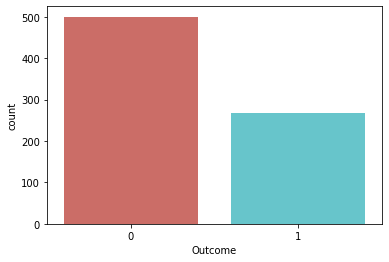

In [8]:
sns.countplot(x='Outcome',data=data,palette='hls')
##Ration of '0' Zero =0.659630607
##Ration of '1' Zero =0.0.340369393
#we can say that or data ratio 65:35 so data is not that much imanced

In [9]:
X=data.loc[:,data.columns != 'Outcome']
y=data.loc[:,data.columns == 'Outcome']

In [10]:
#spliting data in train test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
#learning DT Model without depth
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(train_x,train_y)
y_pred_test=clf.predict(test_x)
y_pred_train=clf.predict(train_x)

Accuracy For Test    :  0.7291666666666666
Accuracy For Train   :  1.0
Confusion Metrix     :  [[101  29]
 [ 23  39]]


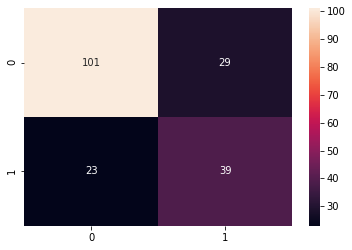

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy For Test    : " ,accuracy_score(test_y,y_pred_test))
print("Accuracy For Train   : " ,accuracy_score(train_y,y_pred_train))
print("Confusion Metrix     : ", confusion_matrix(test_y,y_pred_test))
sns.heatmap(confusion_matrix(test_y,y_pred_test),annot=True,fmt='g')

[Text(464.6970950704225, 527.6117647058824, 'X[1] <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(200.85052816901407, 495.63529411764705, 'X[7] <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(81.34225352112676, 463.6588235294118, 'X[5] <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(28.292957746478873, 431.6823529411765, 'X[0] <= 7.0\ngini = 0.035\nsamples = 113\nvalue = [111, 2]'),
 Text(18.861971830985915, 399.7058823529412, 'X[6] <= 0.672\ngini = 0.018\nsamples = 112\nvalue = [111, 1]'),
 Text(9.430985915492958, 367.7294117647059, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(28.292957746478873, 367.7294117647059, 'X[3] <= 13.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(18.861971830985915, 335.7529411764706, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(37.72394366197183, 335.7529411764706, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(37.72394366197183, 399.7058823529412, 'gini = 0.0\nsamples = 1\nvalu

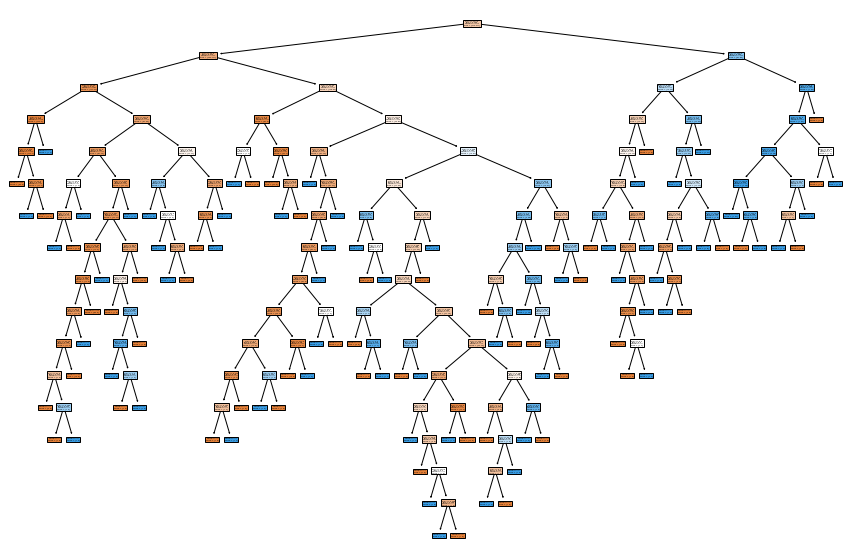

In [13]:
#visualizing DT
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf,filled=True)


#### As We see Our Decision tree is  is very huge becouse we dont costumize depth_size, or max_depth so now we can do Post Pruning on DT. In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. 

[Text(134.1, 211.7178947368421, 'X[1] <= 123.5\nentropy = 0.941\nsamples = 576\nvalue = [370, 206]'),
 Text(40.3875, 200.2736842105263, 'X[5] <= 26.45\nentropy = 0.685\nsamples = 329\nvalue = [269, 60]'),
 Text(7.2, 188.82947368421054, 'X[6] <= 0.675\nentropy = 0.087\nsamples = 92\nvalue = [91, 1]'),
 Text(3.6, 177.38526315789474, 'entropy = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(10.8, 177.38526315789474, 'X[6] <= 0.705\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(7.2, 165.94105263157894, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(14.4, 165.94105263157894, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(73.575, 188.82947368421054, 'X[7] <= 28.5\nentropy = 0.81\nsamples = 237\nvalue = [178, 59]'),
 Text(32.4, 177.38526315789474, 'X[5] <= 30.95\nentropy = 0.549\nsamples = 126\nvalue = [110, 16]'),
 Text(21.6, 165.94105263157894, 'X[0] <= 7.0\nentropy = 0.179\nsamples = 37\nvalue = [36, 1]'),
 Text(18.0, 154.49684210526317, 'entropy = 0.0\nsamples = 36\nv

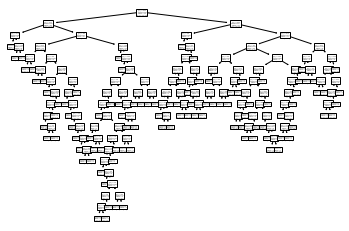

In [14]:
#for entropy
clf_ent=DecisionTreeClassifier(criterion='entropy')
clf_ent.fit(train_x,train_y)
plot_tree(clf_ent)

In [15]:
#if we dont Give it Max_depth it will keep Splitting And Start overfittin to training Data.
#Now Do Pre_Pruning By Passing Parameter call Max_Depth of Tree
clf_gini_max=DecisionTreeClassifier(criterion='gini',max_depth=3)
clf_gini_max.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=3)

Accuracy For Test    :  0.734375
Accuracy For Train   :  0.7621527777777778
Confusion Metrix     :  [[119  11]
 [ 40  22]]


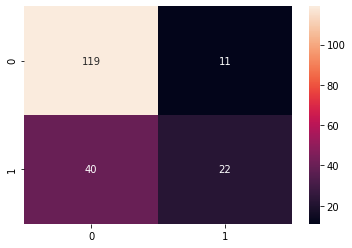

In [16]:
#check Accuracy For Max_Depth =3
y_train_pred_mx=clf_gini_max.predict(train_x)
y_test_pred_mx=clf_gini_max.predict(test_x)
print("Accuracy For Test    : " ,accuracy_score(test_y,y_test_pred_mx))
print("Accuracy For Train   : " ,accuracy_score(train_y,y_train_pred_mx))
print("Confusion Metrix     : ", confusion_matrix(test_y,y_test_pred_mx))
sns.heatmap(confusion_matrix(test_y,y_test_pred_mx),annot=True,fmt='g')

In [17]:
#### By Controlling max_depth Our Model Become Low bias toward training data and overfittin is reduced
print("Accuracy For Test    : " ,accuracy_score(test_y,y_test_pred_mx))
print("Accuracy For Train   : " ,accuracy_score(train_y,y_train_pred_mx))

Accuracy For Test    :  0.734375
Accuracy For Train   :  0.7621527777777778


[Text(390.6, 380.52, 'Glucose <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]\nclass = 0'),
 Text(195.3, 271.8, 'Age <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]\nclass = 0'),
 Text(97.65, 163.07999999999998, 'BMI <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]\nclass = 0'),
 Text(48.825, 54.360000000000014, 'gini = 0.035\nsamples = 113\nvalue = [111, 2]\nclass = 0'),
 Text(146.47500000000002, 54.360000000000014, 'gini = 0.335\nsamples = 122\nvalue = [96, 26]\nclass = 0'),
 Text(292.95000000000005, 163.07999999999998, 'BMI <= 26.35\ngini = 0.476\nsamples = 210\nvalue = [128, 82]\nclass = 0'),
 Text(244.125, 54.360000000000014, 'gini = 0.102\nsamples = 37\nvalue = [35, 2]\nclass = 0'),
 Text(341.77500000000003, 54.360000000000014, 'gini = 0.497\nsamples = 173\nvalue = [93, 80]\nclass = 0'),
 Text(585.9000000000001, 271.8, 'Glucose <= 166.5\ngini = 0.392\nsamples = 131\nvalue = [35, 96]\nclass = 1'),
 Text(488.25, 163.07999999999998, 'DiabetesPedigreeFunctio

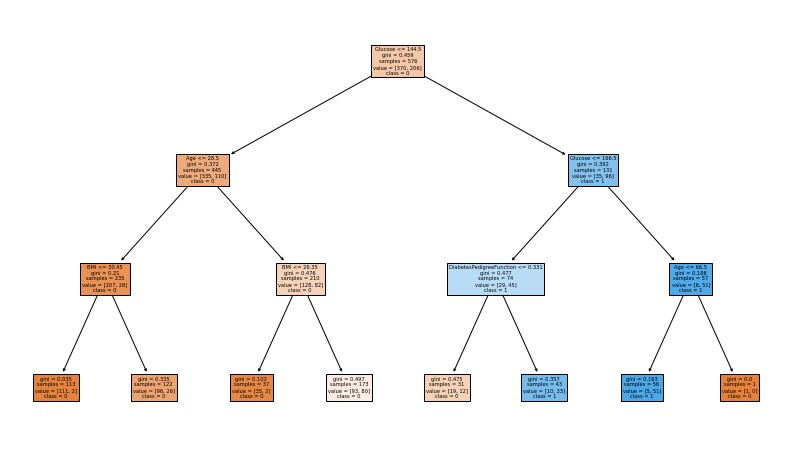

In [18]:
#visualizing Our model with criterea='gini' and max_depth=2
plt.figure(figsize=(14,8))
plot_tree(clf_gini_max,filled=True,feature_names=X.columns,class_names=['0','1'],)

Accuracy For Test    :  0.7447916666666666
Accuracy For Train   :  0.7690972222222222
Confusion Metrix     :  [[112  18]
 [ 31  31]]


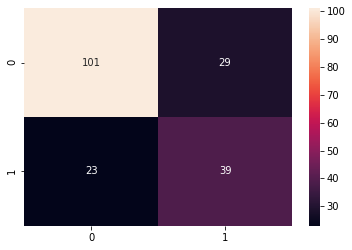

In [19]:
clf_ent_max=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf_ent_max.fit(train_x,train_y)
y_train_pred_mx_ent=clf_ent_max.predict(train_x)
y_test_pred_mx_ent=clf_ent_max.predict(test_x)
print("Accuracy For Test    : " ,accuracy_score(test_y,y_test_pred_mx_ent))
print("Accuracy For Train   : " ,accuracy_score(train_y,y_train_pred_mx_ent))
print("Confusion Metrix     : ", confusion_matrix(test_y,y_test_pred_mx_ent))
sns.heatmap(confusion_matrix(test_y,y_pred_test),annot=True,fmt='g')

In [20]:
### by using entropy as criterea our Accuracy lilte increased and model is good low bias and low varaance
print("Accuracy For Test    : " ,accuracy_score(test_y,y_test_pred_mx_ent))
print("Accuracy For Train   : " ,accuracy_score(train_y,y_train_pred_mx_ent))

Accuracy For Test    :  0.7447916666666666
Accuracy For Train   :  0.7690972222222222


[Text(390.6, 380.52, 'Glucose <= 123.5\nentropy = 0.941\nsamples = 576\nvalue = [370, 206]\nclass = 0'),
 Text(195.3, 271.8, 'BMI <= 26.45\nentropy = 0.685\nsamples = 329\nvalue = [269, 60]\nclass = 0'),
 Text(97.65, 163.07999999999998, 'DiabetesPedigreeFunction <= 0.675\nentropy = 0.087\nsamples = 92\nvalue = [91, 1]\nclass = 0'),
 Text(48.825, 54.360000000000014, 'entropy = 0.0\nsamples = 76\nvalue = [76, 0]\nclass = 0'),
 Text(146.47500000000002, 54.360000000000014, 'entropy = 0.337\nsamples = 16\nvalue = [15, 1]\nclass = 0'),
 Text(292.95000000000005, 163.07999999999998, 'Age <= 28.5\nentropy = 0.81\nsamples = 237\nvalue = [178, 59]\nclass = 0'),
 Text(244.125, 54.360000000000014, 'entropy = 0.549\nsamples = 126\nvalue = [110, 16]\nclass = 0'),
 Text(341.77500000000003, 54.360000000000014, 'entropy = 0.963\nsamples = 111\nvalue = [68, 43]\nclass = 0'),
 Text(585.9000000000001, 271.8, 'BMI <= 30.05\nentropy = 0.976\nsamples = 247\nvalue = [101, 146]\nclass = 1'),
 Text(488.25, 163.0

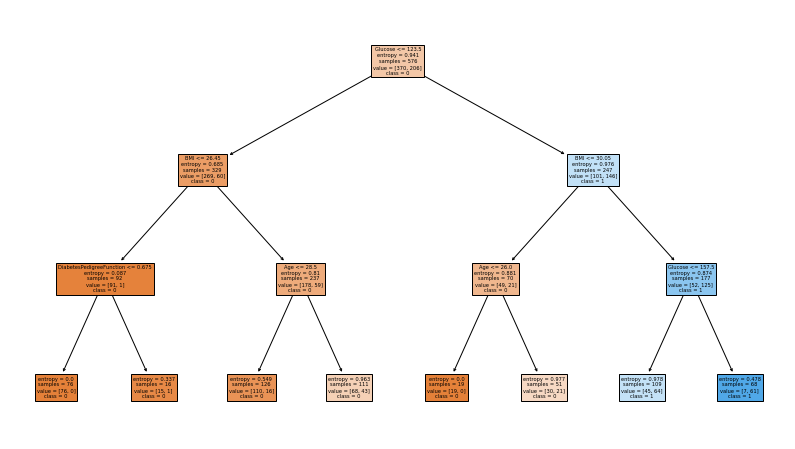

In [21]:
#visualizing Our model with criterea='entropy' and max_depth=2

plt.figure(figsize=(14,8))
plot_tree(clf_ent_max,filled=True,feature_names=X.columns,class_names=['0','1'],)

# Post Pruning
#### Post pruning decision trees with cost complexity pruning
### currentmodule:: sklearn.tree

The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. 

In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

See also minimal_cost_complexity_pruning for details on pruning.

In [22]:
from sklearn.tree import DecisionTreeClassifier
dc_clf=DecisionTreeClassifier(random_state=0)
dc_clf.fit(train_x,train_y)
y_pred_test=dc_clf.predict(test_x)
y_pred_train=dc_clf.predict(train_x)
print('Test Accuracy    : ',accuracy_score(test_y,y_pred_test))
print('Train Accuracy  : ',accuracy_score(train_y,y_pred_train))
# We can see overfitting to training data 

Test Accuracy    :  0.71875
Train Accuracy  :  1.0


[Text(183.85754132231406, 211.04470588235293, 'X[1] <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(76.26384297520661, 198.25411764705882, 'X[7] <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(30.897520661157024, 185.4635294117647, 'X[5] <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(11.067768595041322, 172.6729411764706, 'X[0] <= 7.0\ngini = 0.035\nsamples = 113\nvalue = [111, 2]'),
 Text(7.378512396694215, 159.88235294117646, 'X[6] <= 0.672\ngini = 0.018\nsamples = 112\nvalue = [111, 1]'),
 Text(3.6892561983471075, 147.09176470588235, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(11.067768595041322, 147.09176470588235, 'X[3] <= 13.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(7.378512396694215, 134.30117647058825, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(14.75702479338843, 134.30117647058825, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(14.75702479338843, 159.88235294117646, 'gini = 0.0\nsamples = 

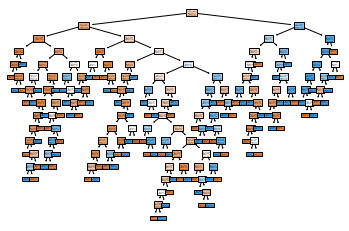

In [23]:
plot_tree(dc_clf,filled=True)

In [24]:
# We Use ccp i.e cost_complexity_parameter or cccp_alpha for pruning DT
path=dc_clf.cost_complexity_pruning_path(train_x,train_y)
ccp_alphas,impurity=path.ccp_alphas,path.impurities
ccp_alphas

array([0.        , 0.00113225, 0.0015191 , 0.0015625 , 0.00160256,
       0.00164227, 0.00172061, 0.00197557, 0.00208333, 0.00213966,
       0.00231481, 0.00231481, 0.00231586, 0.00236304, 0.00240385,
       0.00252525, 0.00260417, 0.00260417, 0.00262241, 0.00277778,
       0.00277778, 0.00277778, 0.00284091, 0.00289352, 0.00294155,
       0.00297619, 0.00303819, 0.0030694 , 0.00308642, 0.0031201 ,
       0.00329041, 0.00338031, 0.00359874, 0.00390625, 0.00400132,
       0.00416667, 0.00417093, 0.00421971, 0.00429235, 0.00446976,
       0.00456673, 0.00505652, 0.00609575, 0.0066976 , 0.00777851,
       0.00846741, 0.00904819, 0.00918507, 0.01765028, 0.02834794,
       0.08287689])

In [25]:
clfs=[]
for alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    clf.fit(train_x,train_y)
    clfs.append(clf)
clfs[:13]  # First 5 

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0011322463768115932, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0015190972222222222, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0015625000000000005, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0016025641025641019, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0016422672672672671, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0017206101190476164, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0019755747126436784, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0020833333333333333, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0021396553325901155, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0023148148148148147, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0023148148148148147, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0023158575241908584, random_state=0)]

In [26]:
#checking score for both train and test
train_score=[clf.score(train_x,train_y) for clf in clfs]
test_score=[clf.score(test_x,test_y) for clf in clfs]

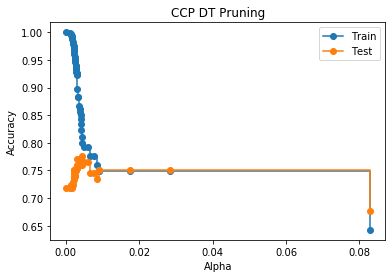

In [27]:
%matplotlib inline
fig, ax=plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('CCP DT Pruning')
plt.plot(ccp_alphas,train_score,marker='o',label='Train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_score,marker='o',label='Test',drawstyle='steps-post')
ax.legend()
plt.show()

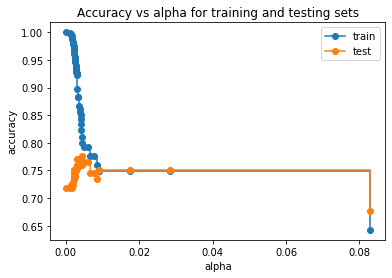

<Figure size 864x576 with 0 Axes>

In [28]:

train_scores = [clf.score(train_x, train_y) for clf in clfs]
test_scores = [clf.score(test_x, test_y) for clf in clfs]

fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
clf_alpha=DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf_alpha.fit(train_x,train_y)
y_pred_test_alpha=clf_alpha.predict(test_x)
y_pred_train_alpha=clf_alpha.predict(train_x)
print('Accuarcy for Train :',accuracy_score(train_y,y_pred_train_alpha))
print('Accuarcy for Test :',accuracy_score(test_y,y_pred_test_alpha))

Accuarcy for Train : 0.8003472222222222
Accuarcy for Test : 0.7760416666666666


[Text(193.15384615384616, 199.32, 'X[1] <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(103.01538461538462, 163.07999999999998, 'X[7] <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(51.50769230769231, 126.83999999999999, 'X[5] <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(25.753846153846155, 90.6, 'gini = 0.035\nsamples = 113\nvalue = [111, 2]'),
 Text(77.26153846153846, 90.6, 'X[1] <= 127.5\ngini = 0.335\nsamples = 122\nvalue = [96, 26]'),
 Text(51.50769230769231, 54.359999999999985, 'gini = 0.267\nsamples = 101\nvalue = [85, 16]'),
 Text(103.01538461538462, 54.359999999999985, 'X[2] <= 73.0\ngini = 0.499\nsamples = 21\nvalue = [11, 10]'),
 Text(77.26153846153846, 18.119999999999976, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(128.76923076923077, 18.119999999999976, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(154.52307692307693, 126.83999999999999, 'X[5] <= 26.35\ngini = 0.476\nsamples = 210\nvalue = [128, 82]'),

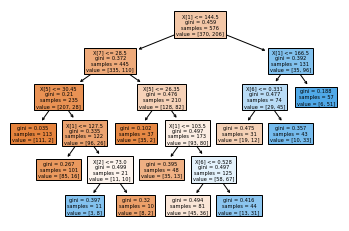

In [30]:
plot_tree(clf_alpha,filled=True)

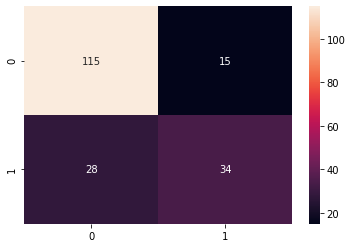

In [31]:
sns.heatmap(confusion_matrix(test_y,y_pred_test_alpha),annot=True,fmt='g')

In [34]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(                           # Create dot data
    clf_alpha, filled=True, rounded=True,
    feature_names=train_x.columns,
    class_names=['0', '1'],
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('clf_alpha.png') 

InvocationException: GraphViz's executables not found